# Manta Ray Classification and Localization

- Devanshi Sanghvi
- Rishabh Shanbhag
- Pavan Choudhari

## Dataset

- Mantaray Image Dataset
- Consists of 5300 images
- The dataset has a metadata JSON file.

## Project Overview
1) Low Risk: 
- Preparing data for DL models.
- Image segmentation (Background removal).

2) Medium Risk:
- Unsupervised image clustering.
- Building image classification model using transfer learning with models like ResNet, VGG, and Inception.
- Siamese Network.

3) High Risk
- Localization of the mantaray in an image using YOLO V3 model. 

# Load the data

First we will start with loading the data from google drive (mount google drive). If this code is being runned locally make sure to unzip the mantaray dataset.

In [ ]:
# !cp /content/drive/MyDrive/orientation.mantaray.coco.tar\ \(2022_01_19\ 17_31_16\ UTC\).gz .
!cp /content/drive/MyDrive/train2020.zip .

In [ ]:
# !tar -xvf orientation.mantaray.coco.tar\ \(2022_01_19\ 17_31_16\ UTC\).gz
!unzip train2020.zip

Archive:  train2020.zip
  inflating: train2020/000000000001.jpg  
  inflating: train2020/000000000002.jpg  
  inflating: train2020/000000000004.jpg  
  inflating: train2020/000000000006.jpg  
  inflating: train2020/000000000008.jpg  
  inflating: train2020/000000000010.jpg  
  inflating: train2020/000000000011.jpg  
  inflating: train2020/000000000012.jpg  
  inflating: train2020/000000000013.jpg  
  inflating: train2020/000000000014.jpg  
  inflating: train2020/000000000017.jpg  
  inflating: train2020/000000000019.jpg  
  inflating: train2020/000000000020.jpg  
  inflating: train2020/000000000022.jpg  
  inflating: train2020/000000000025.jpg  
  inflating: train2020/000000000026.jpg  
  inflating: train2020/000000000027.jpg  
  inflating: train2020/000000000028.jpg  
  inflating: train2020/000000000029.jpg  
  inflating: train2020/000000000031.jpg  
  inflating: train2020/000000000033.jpg  
  inflating: train2020/000000000034.jpg  
  inflating: train2020/000000000038.jpg  
  inflatin

# Import all libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.color import rgb2hsv
from sklearn.cluster import KMeans
from PIL import Image

# View Image Collection

Let us have a look at the training images.

In [ ]:
def image_viewer(rows: int = 5, cols: int = 5, root_train_dir = "/content/train2020/"):

  # Get the list of images in training directory
  train = os.listdir(root_train_dir)

  # Create a grid
  _, axes_grid = plt.subplots(cols, rows, figsize = (3*rows, 3*cols))

  for ax in axes_grid:
    for j in ax:
      j.axis('off')
      # choose a random image

      img_fp = np.random.choice(train)

      j.imshow(np.array(Image.open(f"{root_train_dir}{img_fp}").resize((200, 200))))
      j.set_title(img_fp)

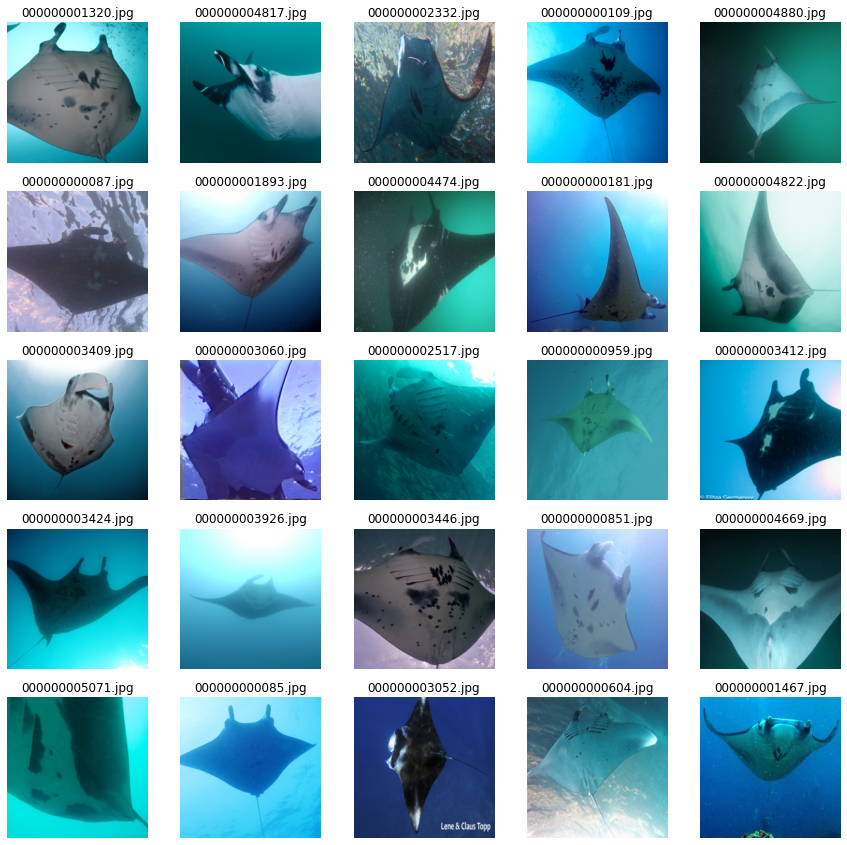

In [ ]:
image_viewer()